# Airline Customer Holiday Booking Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Passanger_booking_data.csv')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Shape of the dataset , Describeing the dataset with and without object.

In [3]:
df.shape

(50002, 14)

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df.describe(include="object")

,sales_channel,trip_type,flight_day,route,booking_origin
count,50002,50002,50002,50002,50002
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44383,49498,8102,2680,17873


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.corr(numeric_only=True)

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212628,-0.115825,0.015613,0.120434,0.028593,0.022984,-0.063198,0.024075
purchase_lead,0.212628,1.000000,-0.076544,0.035980,-0.022175,-0.004466,-0.022622,0.067847,-0.022169
length_of_stay,-0.115825,-0.076544,1.000000,-0.024869,0.176770,0.032287,0.098846,0.141164,-0.042426
flight_hour,0.015613,0.035980,-0.024869,1.000000,-0.011417,0.012177,0.013023,-0.002101,0.007100
wants_extra_baggage,0.120434,-0.022175,0.176770,-0.011417,1.000000,0.207698,0.216501,0.057037,0.068059
wants_preferred_seat,0.028593,-0.004466,0.032287,0.012177,0.207698,1.000000,0.315120,0.101249,0.050068
wants_in_flight_meals,0.022984,-0.022622,0.098846,0.013023,0.216501,0.315120,1.000000,0.154280,0.026458
flight_duration,-0.063198,0.067847,0.141164,-0.002101,0.057037,0.101249,0.154280,1.000000,-0.106251
booking_complete,0.024075,-0.022169,-0.042426,0.007100,0.068059,0.050068,0.026458,-0.106251,1.000000


## Correlation Between Column :

<Axes: >

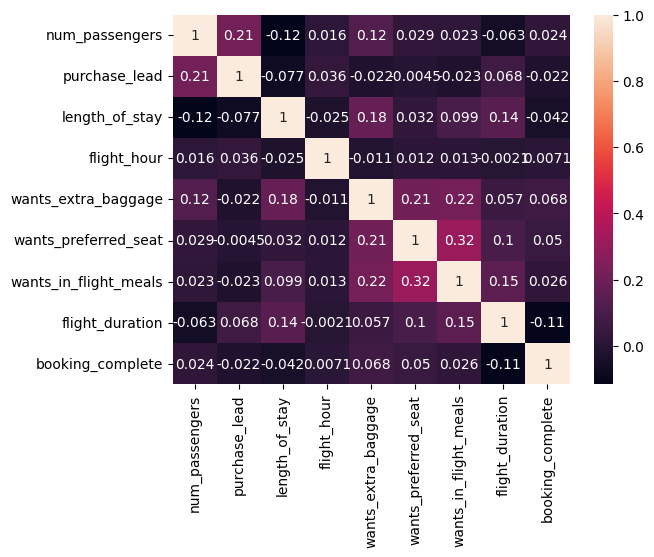

In [8]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [9]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

## Number of passenger per ticket

In [10]:
df["num_passengers"].unique()

array([1, 2, 3, 4, 6, 5, 7, 9, 8], dtype=int64)

In [11]:
df["num_passengers"].value_counts()

num_passengers
1    31353
2    12804
3     2942
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

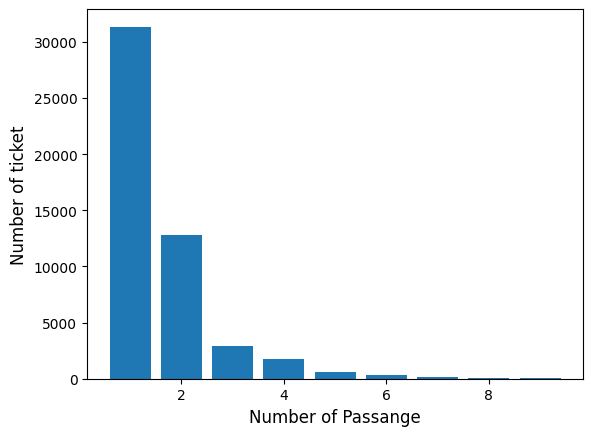

In [70]:
num_passenger=df["num_passengers"].value_counts()
plt.bar(num_passenger.index,num_passenger)
plt.xlabel("Number of Passange",fontsize=12)
plt.ylabel("Number of ticket",fontsize=12)
plt.show()

## How customer reached to Airlines website

In [12]:
df["sales_channel"].value_counts()

sales_channel
Internet    44383
Mobile       5619
Name: count, dtype: int64

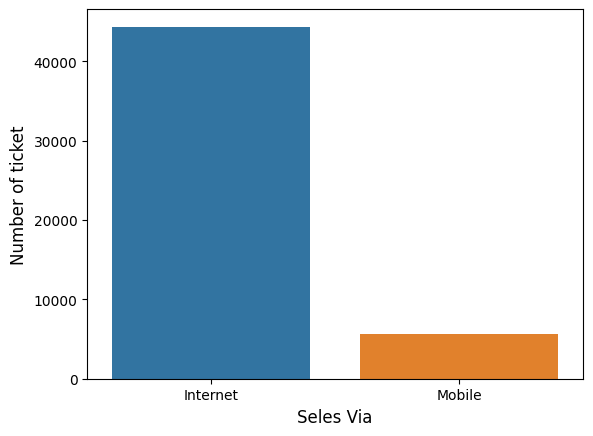

In [71]:
sns.countplot(x="sales_channel",data=df)
plt.xlabel("Seles Via",fontsize=12)
plt.ylabel("Number of ticket",fontsize=12)
plt.show()

## Type of trip and which one used most

In [14]:
df["trip_type"].value_counts()

trip_type
RoundTrip     49498
OneWay          387
CircleTrip      117
Name: count, dtype: int64

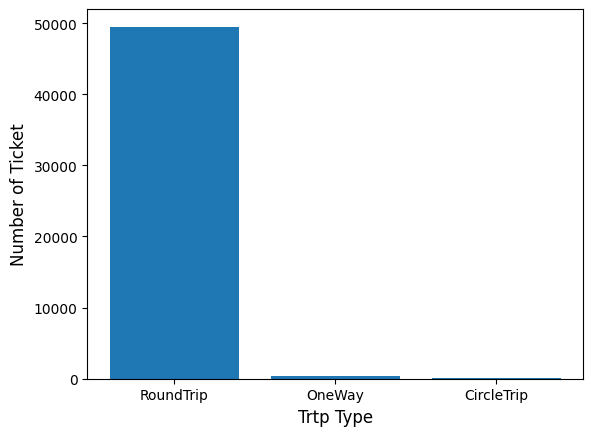

In [74]:
tripe_typ=df["trip_type"].value_counts()
plt.bar(tripe_typ.index,tripe_typ)
plt.xlabel("Trtp Type",fontsize=12)
plt.ylabel("Number of Ticket",fontsize=12)
plt.show()

## Number of flight depart every hour of the day

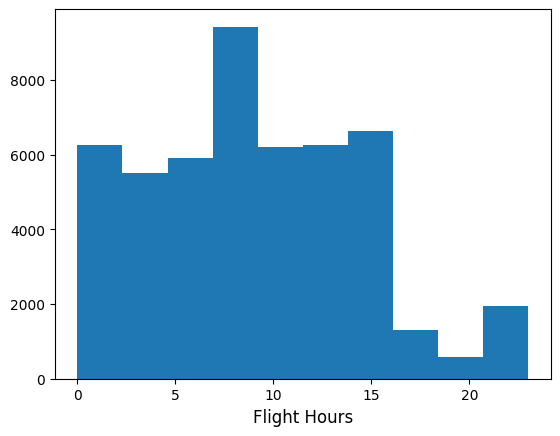

In [78]:
plt.hist(df['flight_hour'])
plt.xlabel("Flight Hours",fontsize=12)
plt.show()

<Axes: xlabel='flight_hour', ylabel='purchase_lead'>

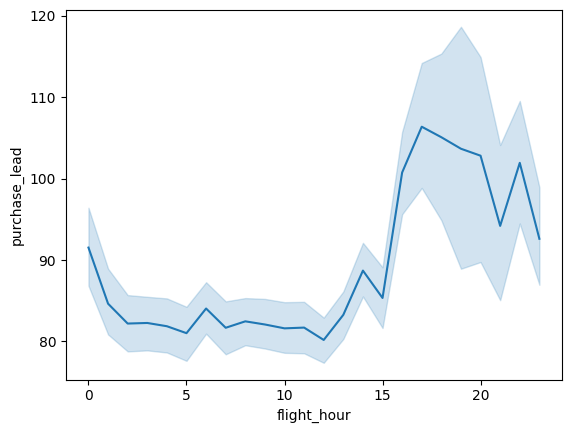

In [79]:
sns.lineplot(x='flight_hour', y="purchase_lead", data=df)

## Number of people successfully booked a holiday or not.

In [99]:
df["booking_complete"].value_counts()

booking_complete
0    42523
1     7479
Name: count, dtype: int64

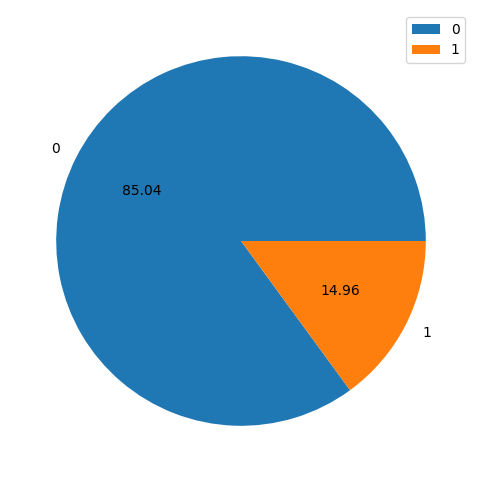

In [94]:
booking_type=df["booking_complete"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(booking_type,autopct="%.2f",labels=booking_type.index)
plt.legend()
plt.show()

## Number and percentege of passanger per day

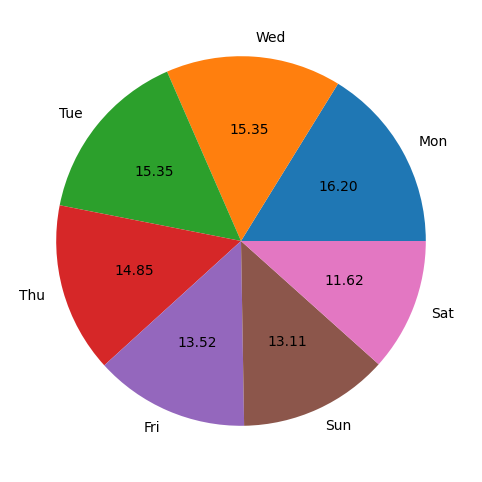

In [19]:
flight_day=df["flight_day"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(flight_day,autopct="%.2f",labels=flight_day.index)
plt.show()

## Top 10 booking origin

In [20]:
df["booking_origin"].value_counts()

booking_origin
Australia               17873
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Tanzania                    1
Jordan                      1
Lebanon                     1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

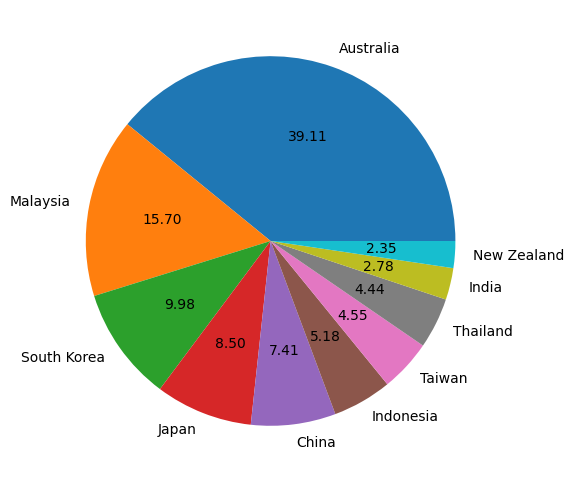

In [21]:
booking_origin=df["booking_origin"].value_counts()[:10]
plt.figure(figsize=(8,6))
plt.pie(booking_origin,autopct="%.2f",labels=booking_origin.index)
plt.show()

## Passanger who wants preferred seat

In [22]:
df["wants_preferred_seat"].value_counts()

wants_preferred_seat
0    35153
1    14849
Name: count, dtype: int64

<Axes: xlabel='wants_preferred_seat', ylabel='count'>

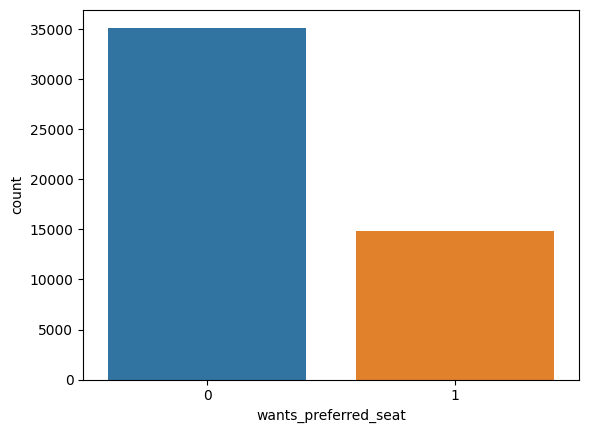

In [23]:
sns.countplot(x="wants_preferred_seat",data=df)

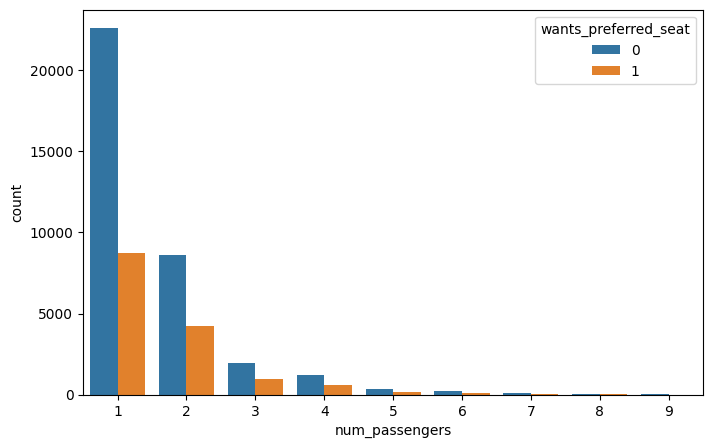

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x="num_passengers",hue="wants_preferred_seat",data=df)
plt.show()

## Purchase lead aginest number of passenger

<Axes: xlabel='num_passengers', ylabel='purchase_lead'>

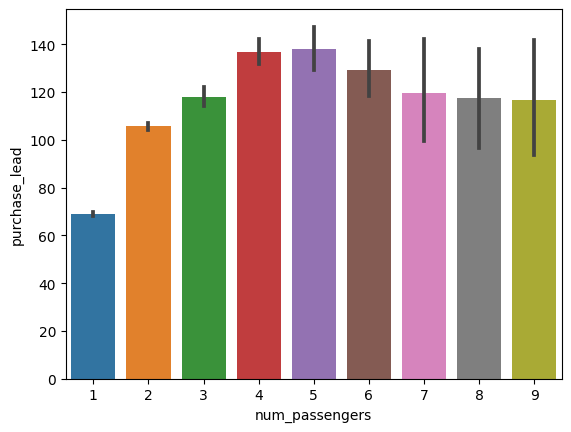

In [26]:
sns.barplot(x="num_passengers",y="purchase_lead", data=df)

## Passenger who prefer extra Baggage

In [27]:
df["wants_extra_baggage"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='trip_type', ylabel='count'>

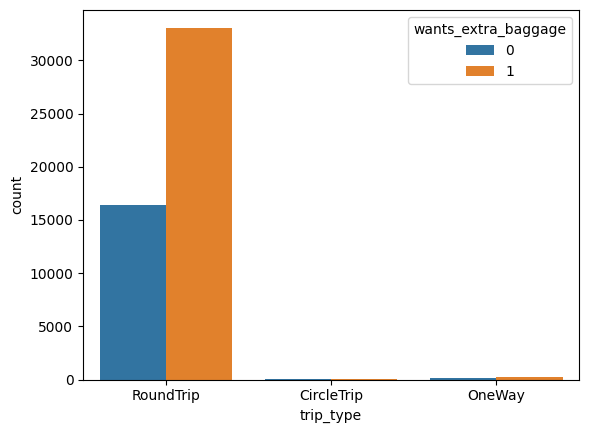

In [28]:
sns.countplot(x="trip_type",hue="wants_extra_baggage",data=df)

<Axes: xlabel='trip_type', ylabel='count'>

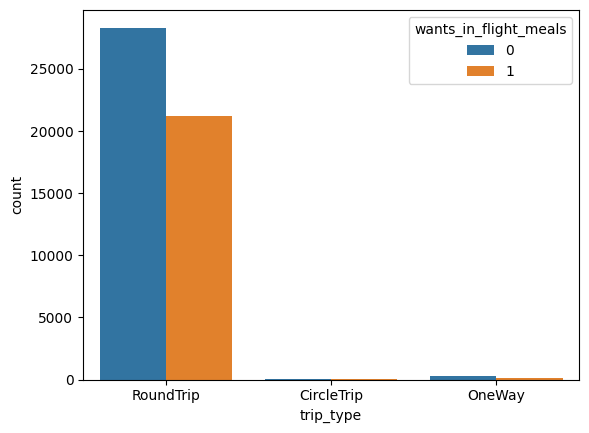

In [29]:
sns.countplot(x="trip_type",hue="wants_in_flight_meals",data=df)

## Number of passenger per day Successfully booked a holiday or not.

In [101]:
Booked_holiday = df[df['booking_complete']==1]


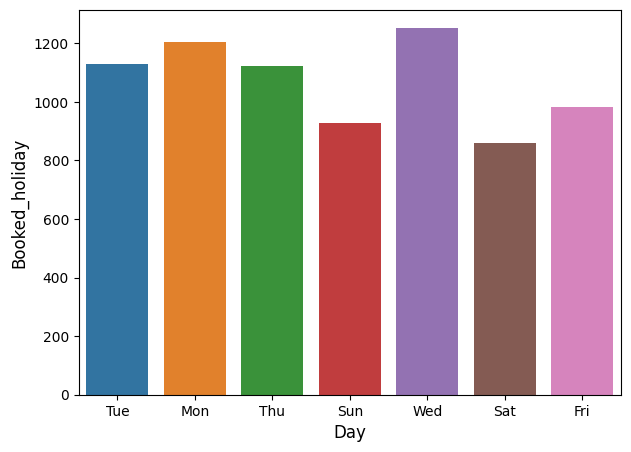

In [102]:
plt.figure(figsize=(7,5))
sns.countplot(x="flight_day",data=Booked_holiday)
plt.xlabel("Day",fontsize=12)
plt.ylabel("Booked_holiday",fontsize=12)
plt.show()

In [103]:
NotBooked_holiday = df[df['booking_complete']==0]

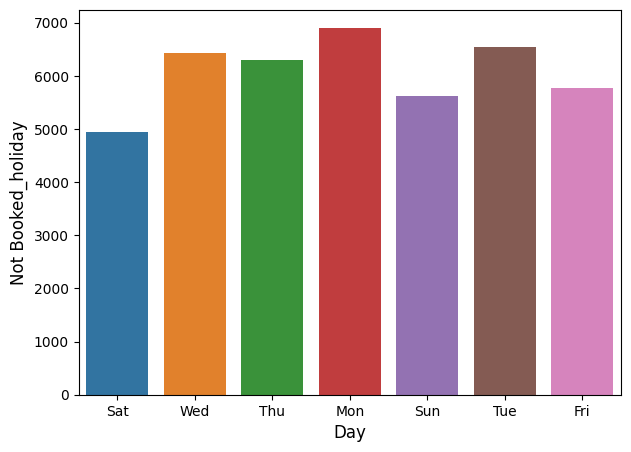

In [104]:
plt.figure(figsize=(7,5))
sns.countplot(x="flight_day",data=NotBooked_holiday)
plt.xlabel("Day",fontsize=12)
plt.ylabel("Not Booked_holiday",fontsize=12)
plt.show()

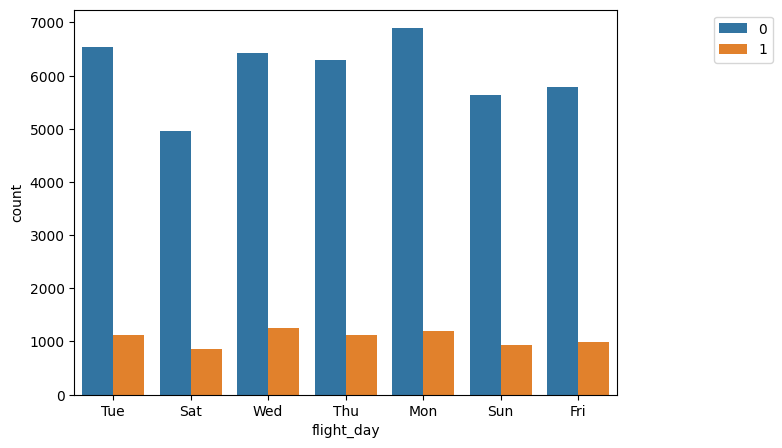

In [105]:
plt.figure(figsize=(7,5))
sns.countplot(x="flight_day",hue='booking_complete',data=df)
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

It sells tickets via mobile (11%) and internet (89%). 
Almost equal number of passengers are gathering every day of week . 
99% of tickets are round trip tickets.
Solo travelers provide less purchase lead . 
A small number of passenger book for holidays.  
Most of the passenger prefer extra baggage 
Small number of passenger wants preferred seat and flight meal.